In [1]:
!pip install scikit-plot

In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix,precision_score,accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
filepath="https://github.com/dsrscientist/DSData/raw/master/loan_prediction.csv"
data=pd.read_csv(filepath)

In [5]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
## We will check the missing value

data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# Finding The Unique Value
for each_col in data.columns:
    print(each_col)
    print(data[each_col].value_counts())
    print("")

Loan_ID
LP002050    1
LP001006    1
LP001788    1
LP001384    1
LP001491    1
           ..
LP001875    1
LP001443    1
LP002731    1
LP002055    1
LP001041    1
Name: Loan_ID, Length: 614, dtype: int64

Gender
Male      489
Female    112
Name: Gender, dtype: int64

Married
Yes    398
No     213
Name: Married, dtype: int64

Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

ApplicantIncome
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

CoapplicantIncome
0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

LoanAmount
120.0    20
110.0    17
100.

<AxesSubplot:>

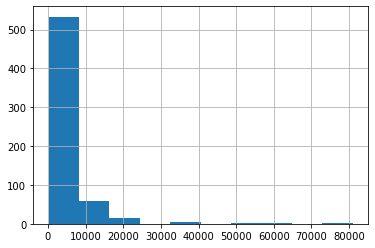

In [9]:
data['ApplicantIncome'].hist()

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

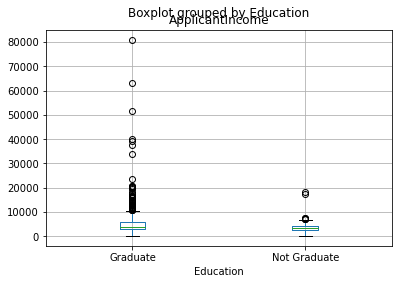

In [10]:
# Boxplot for Variable ApplicantIncome by Variable Education
data.boxplot(column='ApplicantIncome',by='Education')

## Graduates with the high Income are the outliers

<AxesSubplot:>

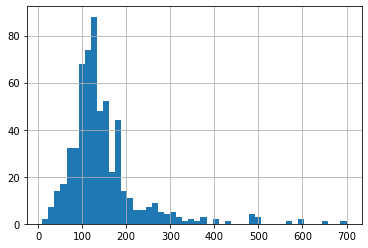

In [11]:
data['LoanAmount'].hist(bins=50)

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Gender'>

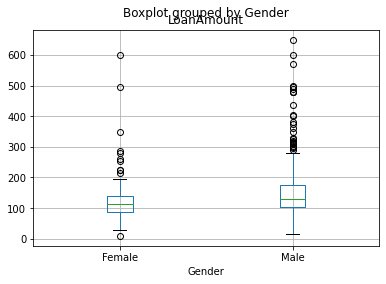

In [12]:
data.boxplot(column='LoanAmount',by='Gender')

In [13]:
# Credit history and the Loan Status
pd.crosstab(data['Credit_History'],data['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [14]:
# Replacing Missing value of Self_Employed with more frequent category
data['Self_Employed'].fillna('No',inplace=True)

In [15]:
# Add both ApplicantIncome and the CoapplicantIncome so that we get TotalIncome
data['TotalIncome']=data['ApplicantIncome']+data['CoapplicantIncome']

<AxesSubplot:>

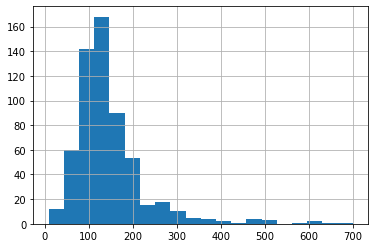

In [16]:
data['LoanAmount'].hist(bins=20)

In [17]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


In [20]:
# Perform Log Transformation of TotalIncome to make it closer to normal
data['LoanAmount_Log']=np.log(data['LoanAmount'])

<AxesSubplot:>

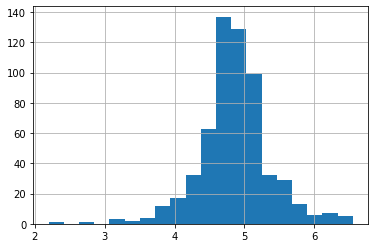

In [21]:
data['LoanAmount_Log'].hist(bins=20)

In [37]:
# Impute Missing value for Gender
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

# Impute Missing value for Married
data['Married'].fillna(data['Married'].mode()[0],inplace=True)

# Impute Missing value for Married
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)

# Impute Missing value for Credit_History
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

# Convert All Non_Numeric value to Numeric_value
cat=['Gender','Married','Dependents','Credit_History','Property_Area','Education','Self_Employed','Loan_ID','Loan_Status']

for var in cat:
    le=preprocessing.LabelEncoder()
    data[var]=le.fit_transform(data[var].astype('str'))
data.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int32
Loan_Status            int32
TotalIncome          float64
LoanAmount_Log       float64
dtype: object

In [38]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_Log
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1,5849.0,4.857444
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0,6091.0,4.852030
2,112,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1,3000.0,4.189655
3,223,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1,4941.0,4.787492
4,334,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1,6000.0,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,567,0,0,0,0,0,2900,0.0,71.000000,360.0,1,0,1,2900.0,4.262680
610,569,1,1,3,0,0,4106,0.0,40.000000,180.0,1,0,1,4106.0,3.688879
611,570,1,1,1,0,0,8072,240.0,253.000000,360.0,1,2,1,8312.0,5.533389
612,571,1,1,2,0,0,7583,0.0,187.000000,360.0,1,2,1,7583.0,5.231109


In [39]:
#Imputing Missing values with mean for continuous variable
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['LoanAmount_Log'].fillna(data['LoanAmount_Log'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['ApplicantIncome'].fillna(data['ApplicantIncome'].mean(), inplace=True)
data['CoapplicantIncome'].fillna(data['CoapplicantIncome'].mean(), inplace=True)

In [34]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_Log
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1,5849.0,4.857444
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0,6091.0,4.852030
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1,3000.0,4.189655
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1,4941.0,4.787492
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1,6000.0,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1,0,1,2900.0,4.262680
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1,0,1,4106.0,3.688879
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1,2,1,8312.0,5.533389
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1,2,1,7583.0,5.231109


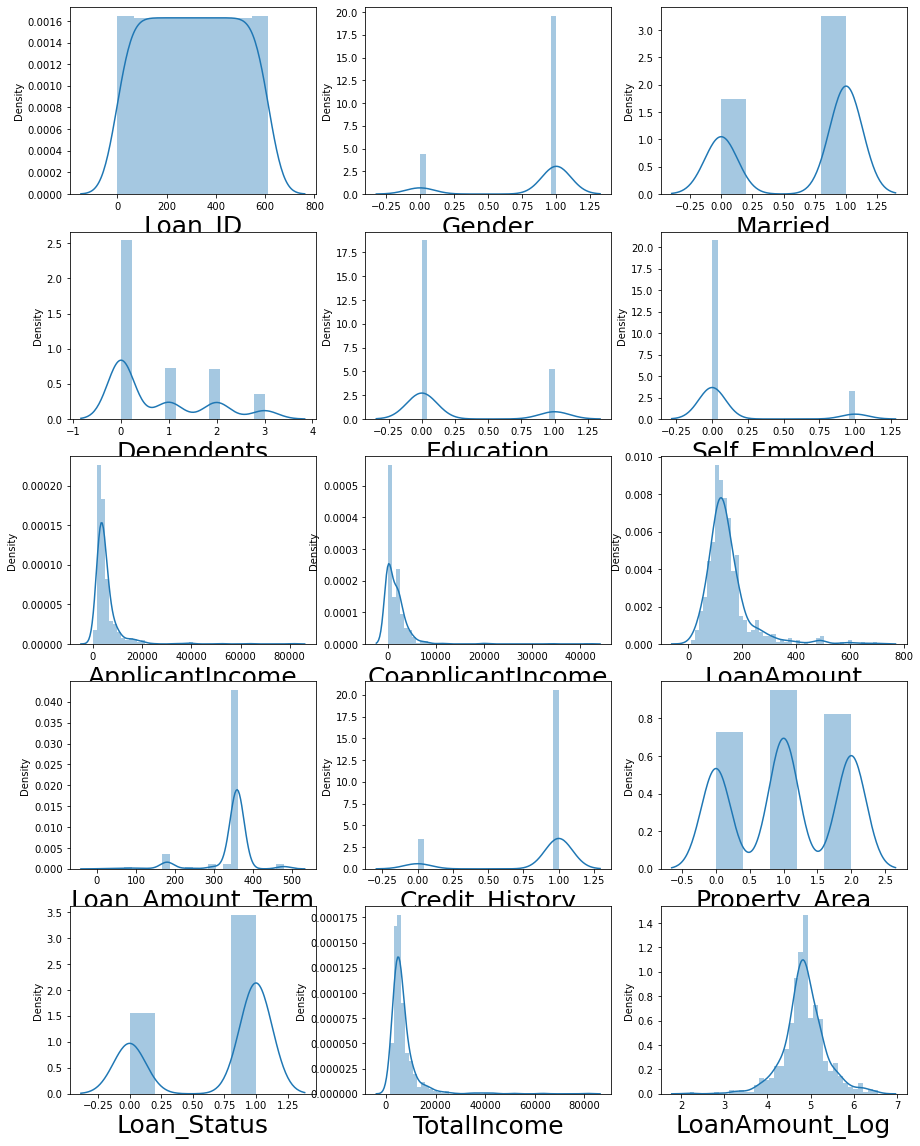

In [41]:
### Now we will visualize the data

plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1


#for columns in data.columns.values:
for column in data:
    if plotnumber<=15:
        
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

In [42]:
data.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
TotalIncome          5.633449
LoanAmount_Log      -0.196534
dtype: float64

In [50]:
data.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_Log
Loan_ID,1.000000,-0.006186,0.029160,0.064939,0.054814,0.048190,-0.066040,0.062354,0.001424,-0.047054,-0.046211,0.017476,-0.025113,-0.034214,0.010020
Gender,-0.006186,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987,0.093191,0.143435
Married,0.029160,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478,0.083319,0.179826
Dependents,0.064939,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118,0.125590,0.156731
Education,0.054814,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884,-0.161362,-0.145790
Self_Employed,0.048190,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700,0.113000,0.109680
ApplicantIncome,-0.066040,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710,0.893037,0.435392
CoapplicantIncome,0.062354,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187,0.342781,0.206253
LoanAmount,0.001424,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416,0.620102,0.896371
Loan_Amount_Term,-0.047054,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974,-0.069830,0.087186


<AxesSubplot:>

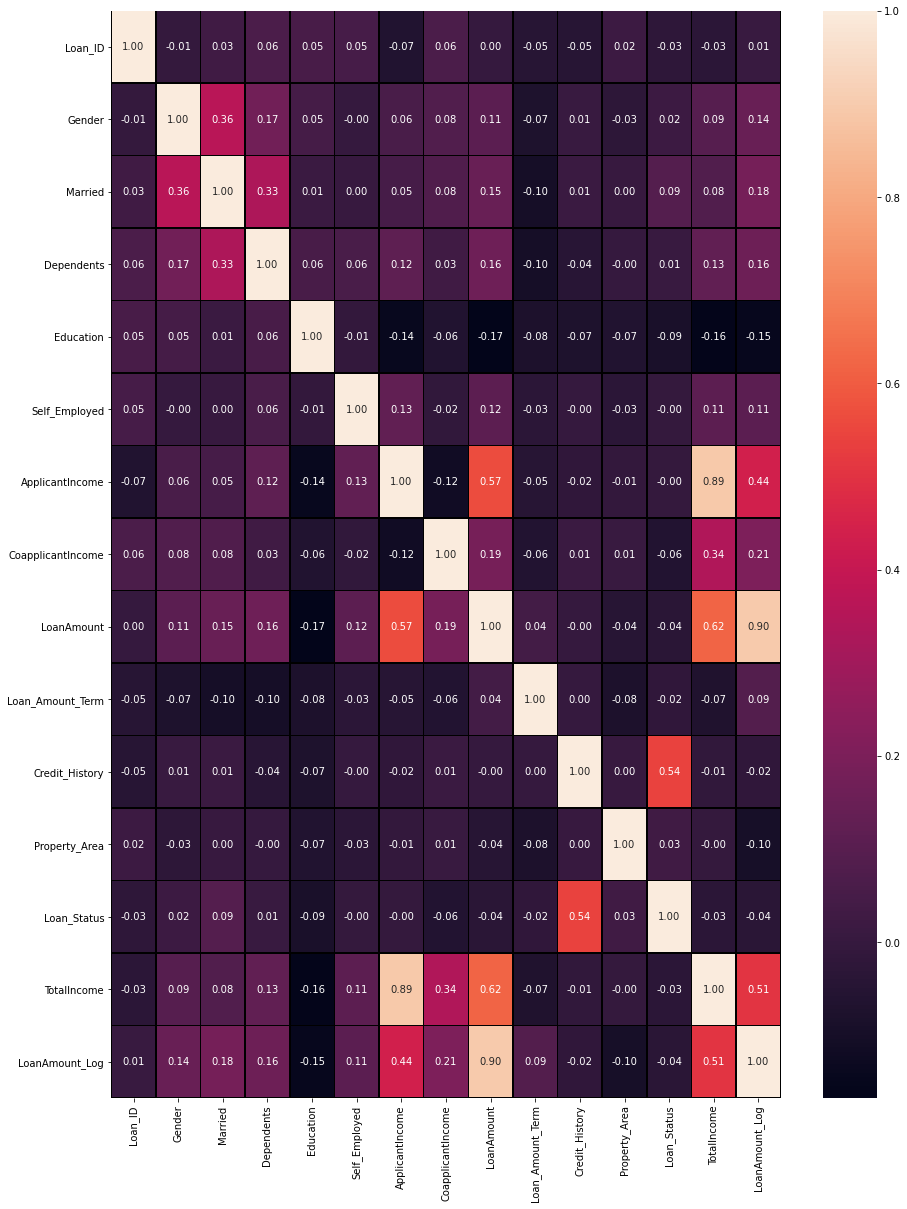

In [51]:
#we can visualize this correlation between then using heatmap

plt.figure(figsize=(15,20))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

## Removing The Outlier Using Z-Score

In [43]:
from scipy.stats import zscore
import numpy as np

In [44]:
z=np.abs(zscore(data))
threshold=3
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(614, 15)
(575, 15)


## Splitting the data into "X" as a features and "Y" as a Vector or a Label

In [52]:
X = data.drop("Loan_Status", axis=1)
Y = data["Loan_Status"]

## Splitting The data Using Train_Test_Split

In [61]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=31, test_size=.20)

## Building The Model AND Cross-Validation

In [58]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)
print(accuracy_score(Y_test,y_pred))
cfm=confusion_matrix(Y_test,y_pred)
print(cfm)
print(classification_report(Y_test,y_pred,digits=2))

0.6504065040650406
[[10 24]
 [19 70]]
              precision    recall  f1-score   support

           0       0.34      0.29      0.32        34
           1       0.74      0.79      0.77        89

    accuracy                           0.65       123
   macro avg       0.54      0.54      0.54       123
weighted avg       0.63      0.65      0.64       123



In [64]:
#we will use cross_validation to check whether model is overfitted

cross_val_score(knn,X,Y,cv=5)

#now i will take the mean of it

cross_val_score(knn,X,Y,cv=5).mean()

0.6075036652005864

In [59]:
# Logistic Regression

lr=LogisticRegression()
lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)
print(accuracy_score(Y_test,y_pred))
cfm=confusion_matrix(Y_test,y_pred)
print(cfm)
print(classification_report(Y_test,y_pred,digits=2))

0.8373983739837398
[[16 18]
 [ 2 87]]
              precision    recall  f1-score   support

           0       0.89      0.47      0.62        34
           1       0.83      0.98      0.90        89

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.76       123
weighted avg       0.85      0.84      0.82       123



In [63]:
#we will use cross_validation to check whether model is overfitted

cross_val_score(lr,X,Y,cv=5)

#now i will take the mean of it

cross_val_score(lr,X,Y,cv=5).mean()

0.771944555511129

In [65]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_pred=dt.predict(X_test)
print(accuracy_score(Y_test,y_pred))
cfm=confusion_matrix(Y_test,y_pred)
print(cfm)

0.7154471544715447
[[23 11]
 [24 65]]


In [66]:
#we will use cross_validation to check whether model is overfitted

cross_val_score(dt,X,Y)

#now i will take the mean of it

cross_val_score(dt,X,Y).mean()

0.638371318139411

In [67]:
svm_clf=SVC()
svm_clf.fit(X_train,Y_train)
y_pred=dt.predict(X_test)
print(accuracy_score(Y_test,y_pred))
cfm=confusion_matrix(Y_test,y_pred)
print(cfm)

0.7154471544715447
[[23 11]
 [24 65]]


In [68]:
cross_val_score(svm_clf,X,Y,cv=51)

#now i will take the mean of it

cross_val_score(svm_clf,X,Y,cv=51).mean()

0.6840120663650074

In [69]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

0.8292682926829268
[[16 18]
 [ 3 86]]


In [70]:
cross_val_score(gaussian,X,Y,cv=51)

#now i will take the mean of it

cross_val_score(gaussian,X,Y,cv=51).mean()

0.7929864253393666

In [77]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

0.6991869918699187
[[ 2 32]
 [ 5 84]]


In [80]:
cross_val_score(sgd,X,Y,cv=3)

#now i will take the mean of it

cross_val_score(sgd,X,Y,cv=3).mean()

0.5588394707476486

In [84]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
y_pred = random_forest.predict(X_test)
print(accuracy_score(Y_test, y_pred))
cfm=confusion_matrix(Y_test,y_pred)
print(cfm)

0.8292682926829268
[[19 15]
 [ 6 83]]


In [85]:
#we will use cross_validation to check whether model is overfitted

cross_val_score(random_forest,X,Y,cv=5)

#now i will take the mean of it

cross_val_score(random_forest,X,Y,cv=5).mean()

0.7736771957883514

## Hyper-Parameter Tunning

In [86]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'n_estimators': [10, 25, 50, 100, 150, 200],
                       'max_features':['auto','square','log2'],
                       'max_depth':[1, 2, 3, 4, 5],
                       'criterion':['gini', 'entropy']}

tree_cv = RandomizedSearchCV(random_forest, param_dist, cv = 5)

tree_cv.fit(X, Y)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'n_estimators': 200, 'max_features': 'auto', 'max_depth': 4, 'criterion': 'gini'}
Best score is 0.8078501932560309


In [87]:
best_model = tree_cv.best_estimator_
best_model

RandomForestClassifier(max_depth=4, n_estimators=200)

In [88]:
mod=RandomForestClassifier(criterion='gini',max_depth=4,max_features='auto',n_estimators=200)
mod.fit(X_train,Y_train)
pred=mod.predict(X_test)
print(accuracy_score(Y_test,pred)*100)

85.36585365853658


## Plotting The Roc-Auc-Curve

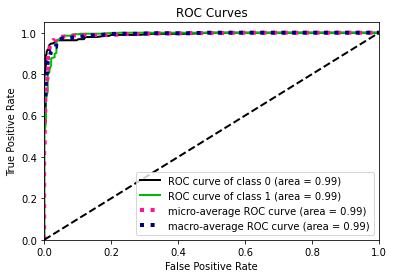

In [89]:
from sklearn.metrics import roc_curve
import scikitplot as skl
probas=random_forest.predict_proba(X)
skl.metrics.plot_roc(Y,probas)
plt.show()

## Saving The Model

In [90]:
import joblib
joblib.dump(mod,"LoanApplicationModel.pkl")

['LoanApplicationModel.pkl']